In [98]:
import requests

import pandas as pd

import json

import numpy as np

from datetime import datetime

Token = 'JDLcriIjMJZqrjHlnFrnmGilleyHzQwh'

f =requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00012960&units=standard&startdate=2010-05-01&enddate=2010-05-31&limit=1000', headers={'token':Token})
e = json.loads(f.text)

m_dt=[]
max_temp=[]
min_temp=[]
prcp_val=[]



max_temps = [item for item in e['results'] if item['datatype']=='TMAX']
m_dt += [item['date'] for item in max_temps]
max_temp += [item['value'] for item in max_temps]

min_temps = [item for item in e['results'] if item['datatype']=='TMIN']
min_temp += [item['value'] for item in min_temps]

prcp = [item for item in e['results'] if item['datatype']=='PRCP']
prcp_val += [item['value'] for item in prcp]


df_temp = pd.DataFrame()

df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in m_dt]
df_temp['MaxTemp'] = [float(v)/10.0*1.8 + 32 for v in max_temp]
df_temp['MinTemp'] = [float(v)/10.0*1.8 + 32 for v in min_temp]
df_temp['PRCP'] = [v for v in prcp_val]


print(df_temp)

    




         date  MaxTemp  MinTemp  PRCP
0  2010-05-01    47.66    45.14  0.00
1  2010-05-02    47.66    42.98  0.00
2  2010-05-03    48.56    42.08  0.00
3  2010-05-04    48.02    41.72  0.00
4  2010-05-05    48.74    42.08  0.00
5  2010-05-06    48.02    43.34  0.00
6  2010-05-07    48.74    44.78  0.00
7  2010-05-08    46.94    43.88  0.00
8  2010-05-09    46.22    42.98  0.00
9  2010-05-10    47.84    45.14  0.00
10 2010-05-11    48.38    45.68  0.00
11 2010-05-12    48.02    45.68  0.00
12 2010-05-13    47.48    45.68  0.00
13 2010-05-14    47.66    44.24  2.44
14 2010-05-15    45.86    44.24  0.22
15 2010-05-16    47.84    44.24  0.00
16 2010-05-17    48.56    44.24  0.07
17 2010-05-18    47.66    44.06  0.00
18 2010-05-19    48.38    44.78  0.00
19 2010-05-20    48.38    45.50  0.00
20 2010-05-21    48.56    45.50  0.00
21 2010-05-22    48.38    45.50  0.00
22 2010-05-23    48.38    45.86  0.00
23 2010-05-24    48.20    45.32  0.00
24 2010-05-25    48.02    44.78  0.00
25 2010-05-2

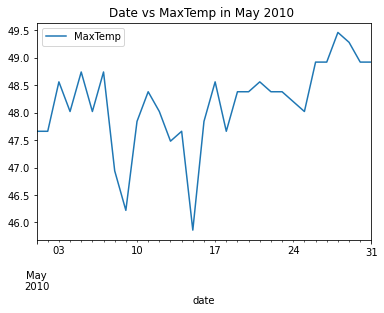

In [66]:
import matplotlib.pyplot as plot
df_temp.plot.line(x="date", y='MaxTemp', title="Date vs MaxTemp in May 2010 ");
plot.show(block=True);

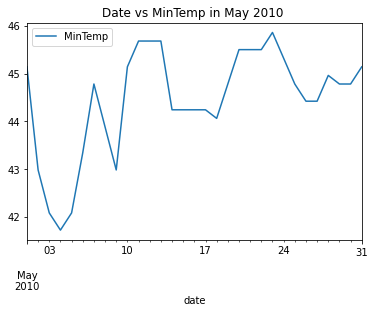

In [67]:
import matplotlib.pyplot as plot
df_temp.plot.line(x="date", y='MinTemp', title="Date vs MinTemp in May 2010 ");
plot.show(block=True)

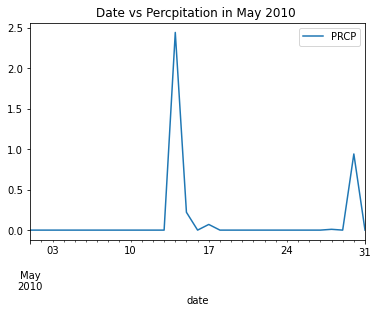

In [69]:
import matplotlib.pyplot as plot
df_temp.plot.line(x="date", y='PRCP', title="Date vs Percpitation in May 2010 ");
plot.show(block=True)

In [99]:
g =requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:37&limit=1000', headers={'token':Token})
h = json.loads(g.text)


In [92]:
longitude=[]
latitude=[]
station_id=[]
name=[]



longitude += [item['longitude'] for item in h['results']]
latitude += [item['latitude'] for item in h['results']]
name += [item['name'] for item in h['results']]
station_id += [item['id'] for item in h['results']]

df_temp2 = pd.DataFrame()

df_temp2['name'] = [v for v in name]
df_temp2['station_id'] = [v for v in station_id]
df_temp2['longitude'] = [v for v in longitude]
df_temp2['latitude'] = [v for v in latitude]



df_temp2.drop_duplicates()
print(df_temp2)



                         name         station_id  longitude   latitude
0            ALBEMARLE, NC US        COOP:310090 -80.199440  35.399930
1             ALTAPASS, NC US        COOP:310160 -82.016670  35.900000
2              ANDREWS, NC US        COOP:310184 -83.838610  35.201390
3          ANDREWS DAM, NC US        COOP:310192 -83.916670  35.066670
4                 APEX, NC US        COOP:310212 -78.836970  35.742630
..                        ...                ...        ...        ...
995  POLKVILLE 0.8 NNW, NC US  GHCND:US1NCCV0017 -81.650265  35.427228
996  MOORESBORO 2.7 SW, NC US  GHCND:US1NCCV0019 -81.730530  35.268827
997       SHELBY 4.7 E, NC US  GHCND:US1NCCV0021 -81.459345  35.288211
998   LAWNDALE 2.2 NNE, NC US  GHCND:US1NCCV0022 -81.544534  35.443105
999     SHELBY 1.7 NNW, NC US  GHCND:US1NCCV0023 -81.551353  35.312069

[1000 rows x 4 columns]


In [93]:
import geojson

In [96]:
def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Point((X["longitude"],
                                                    X["latitude"])),
                            properties=dict(name=X["name"],
                                            description=X["station_id"])))
    df.apply(insert_features, axis=1)
    with open('map1.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

In [97]:
data2geojson(df_temp2)